# Neural Network-Practical Work2 - Group A (Lin,Sheng-Huei)

import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #with this fuction, you define how you want to separate the data to test and train the function
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split #with this fuction, you define how you want to separate the data to test and train the function
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/iris1.csv")

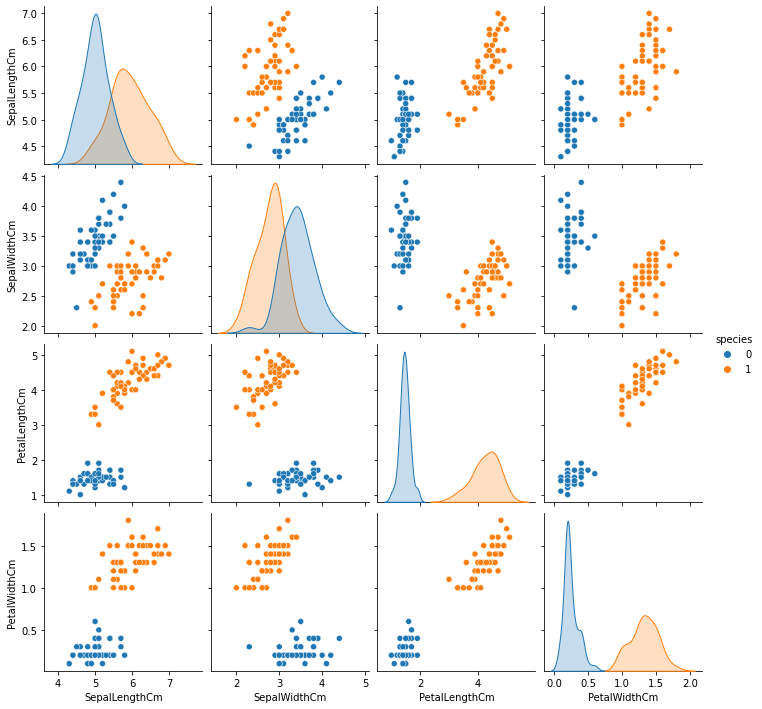

In [3]:
sns.pairplot(df, hue="species")

In [4]:
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   species        100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [5]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
x=df.iloc[:, 0:2]
print(x)
y=df['species']
print(y)

    SepalLengthCm  SepalWidthCm
0             5.1           3.5
1             4.9           3.0
2             4.7           3.2
3             4.6           3.1
4             5.0           3.6
..            ...           ...
95            5.7           3.0
96            5.7           2.9
97            6.2           2.9
98            5.1           2.5
99            5.7           2.8

[100 rows x 2 columns]
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64


In [7]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species'],
      dtype='object')


# dataset partitioning (training 70% , test30%)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                   random_state=42, stratify = y) #definition of the model and define the stratify in order to not loose the proportion of the variables. 

In [9]:
SGD = SGDClassifier(loss='perceptron', eta0=0.001, max_iter=100, learning_rate='optimal')

# Fit the training data

In [10]:
SGD.fit(x_train, y_train)

SGDClassifier(eta0=0.001, loss='perceptron', max_iter=100)

In [11]:
Predictions = SGD.predict(x_test)

In [12]:
SGD.score(x_test, y_test)

0.9333333333333333

In [20]:
W1 = SGD.coef_[0][0]
print(W1)

116.034719049794


In [14]:
W2 = SGD.coef_[0][1]
print(W2)

-196.89355870260334


In [15]:
W0 = SGD.intercept_[0]
print(W0)

-54.57075263875032


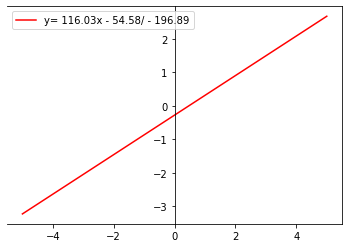

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_line = np.linspace(-5,5,100)
ax.spines['left'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x_line, (W1*x_line+W0)/-W2, '-r', label = 'y= 116.03x - 54.58/ - 196.89' )
plt.legend(loc= 'upper left')
plt.show()

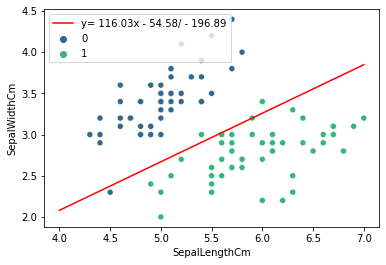

In [26]:
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue= df['species'], palette = "viridis")
x_line = np.linspace(4,7,100)
plt.plot(x_line, (W1*x_line+W0)/-W2, '-r', label = 'y= 116.03x - 54.58/ - 196.89' )
plt.legend()
plt.show()